In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# PILE LOAD PREDICTION USING MACHINE LEARNING AND DEEP LEARNING MODEL

## IMPORT NECESSARY TOOLS

In [1]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## import the df

In [2]:
df = pd.read_excel('/kaggle/input/pile-load/Data-2-Copy.xlsx')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.to_csv('/kaggle/working/pile-load.csv', index=False)

In [5]:
df = pd.read_csv('/kaggle/working/pile-load.csv')

In [6]:
df.shape

(100, 9)

In [7]:
df.head(2)

,Pile Material,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m),Pile Capacity (kN)
0,Steel,33.0,28.85,9.82,12.49,20.1,0.1,19.5,1040.0
1,Steel,33.0,29.89,9.73,12.41,27.0,0.1,23.5,1400.0


In [8]:
# Get the column names
column_names = df.columns.tolist()
column_names

['Pile Material',
 'Average Cohesion (kN/m2)',
 'Average Friction angle (°)',
 'Average soil Specific weight (kN/m3)',
 'Average Pile-Soil friction angle (°)',
 'Flap Number',
 'Pile Area (m2)',
 'Pile Length (m)',
 'Pile Capacity (kN)']

In [9]:
df.dtypes

Pile Material                            object
Average Cohesion (kN/m2)                float64
Average Friction angle (°)              float64
Average soil Specific weight (kN/m3)    float64
Average Pile-Soil friction angle (°)    float64
Flap Number                             float64
Pile Area (m2)                          float64
Pile Length (m)                         float64
Pile Capacity (kN)                      float64
dtype: object

<Axes: >

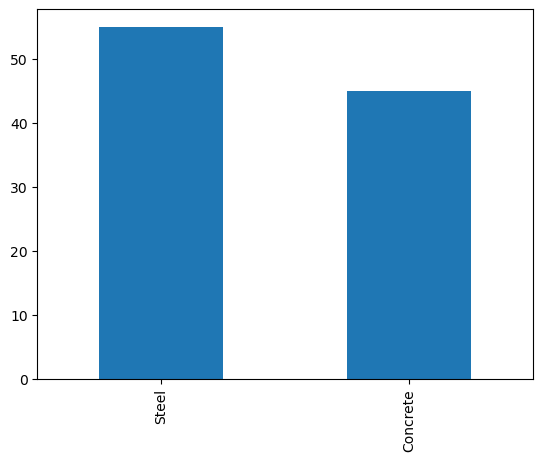

In [10]:
df['Pile Material'].value_counts().plot(kind='bar')

## So group the df by steel and concrete

In [12]:
sdf = df[df['Pile Material'] == 'Steel'].copy()
cdf = df[df['Pile Material'] == 'Concrete'].copy()

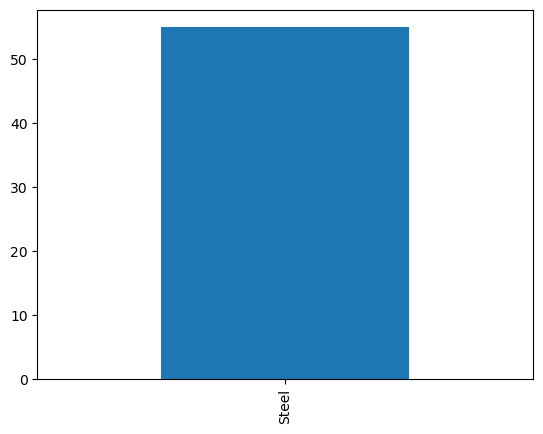

In [13]:
sdf['Pile Material'].value_counts().plot(kind='bar');

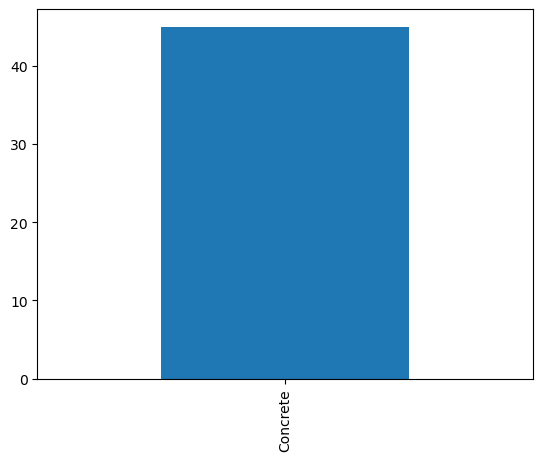

In [177]:
cdf['Pile Material'].value_counts().plot(kind='bar');


# For Steel

In [14]:
sdf.head()

,Pile Material,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m),Pile Capacity (kN)
0,Steel,33.0,28.85,9.82,12.49,20.1,0.1,19.5,1040.0
1,Steel,33.0,29.89,9.73,12.41,27.0,0.1,23.5,1400.0
2,Steel,33.0,28.81,9.82,12.49,20.0,0.1,19.4,990.0
3,Steel,0.0,28.00,9.57,12.27,21.0,0.1,19.5,960.0
4,Steel,0.0,28.00,9.69,12.22,24.0,0.1,23.5,1330.0


## Check Null Values

In [15]:
sdf.isna().sum()

Pile Material                           0
Average Cohesion (kN/m2)                0
Average Friction angle (°)              0
Average soil Specific weight (kN/m3)    0
Average Pile-Soil friction angle (°)    0
Flap Number                             0
Pile Area (m2)                          0
Pile Length (m)                         0
Pile Capacity (kN)                      0
dtype: int64

In [16]:
sdf.shape

(55, 9)

In [18]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR



from sklearn.model_selection import train_test_split

# Set data
X = sdf.drop(['Pile Material', 'Pile Capacity (kN)'], axis=1)
y = sdf['Pile Capacity (kN)']
# Split the data into training and testing sets



In [27]:
np.random.seed(19)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(44, 11, 44, 11)

In [20]:
sdf=sdf.drop(['Pile Material'],axis=1)

In [137]:
from sklearn.model_selection import train_test_split
ys=cdf['Pile Capacity (kN)']

In [141]:
Xs=cdf.drop(['Pile Capacity (kN)'],axis=1)

In [28]:
X_train.head(2)

,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m)
26,6.71,35.69,12.92,16.2,180.0,0.1,20.0
30,7.83,36.57,13.46,17.0,63.0,0.1,14.4


## RandomForestRegressor

In [37]:
def test(n, model):
    '''
    This fucntion checks for which random state the model gives the best result
    '''
    np.random.seed(n)
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2)
    model=RandomForestRegressor(n_estimators=1000,max_leaf_nodes=40,random_state=42)
    model.fit(X_train,y_train)
    return model.score(X_test, y_test)


In [66]:
np.random.seed(28)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model=RandomForestRegressor(n_estimators=1000,max_leaf_nodes=40,random_state=42)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9697875362087327

In [51]:
y_test

59     2150.0
55     3570.0
31     1830.0
30     1300.0
63     3870.0
75     1030.0
62     4000.0
2       990.0
50     3350.0
23    49350.0
51     3750.0
Name: Pile Capacity (kN), dtype: float64

## 28 shows the best result

In [38]:
for i in range(1, 50):
    if test(i, model)>.90:
        print(i)

7
11
17
24
26
28
30
36
45


In [54]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        'training MAE': mean_absolute_error(y_train, train_preds),
        'test MAE': mean_absolute_error(y_test, test_preds),
        
        'training MAPE': mean_absolute_percentage_error(y_train, train_preds),
        'test MAPE': mean_absolute_percentage_error(y_test, test_preds),
        
        'training MSE': mean_squared_error(y_train, train_preds),
        'test MSE': mean_squared_error(y_test, test_preds),
        
        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2': r2_score(y_test, test_preds)
    }
    return scores


def difference(model):
    '''
    Plots the difference between true label and predicted label.
    '''
    prbdf = pd.DataFrame({
        'Prediction': model.predict(X_test),
        'True': np.array(y_test)
    })
    prbdf.plot(kind='bar', figsize = (10, 5))

In [67]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)
print(np.array(y_test))

[ 4418.0985  4216.127   2031.822   3330.23    4372.597   2202.6645
  4485.8435  1075.3715  4193.997  42410.88    3572.536 ]
[ 2150.  3570.  1830.  1300.  3870.  1030.  4000.   990.  3350. 49350.
  3750.]


In [68]:
show_scores(model)

{'training MAE': 779.7194545454543,
 'test MAE': 1395.7577272727276,
 'training MAPE': 0.17123580139461814,
 'test MAPE': 0.4385332321611212,
 'training MSE': 2234922.673699828,
 'test MSE': 5499145.966690367,
 'Training R^2': 0.9827854376149204,
 'Valid R^2': 0.9697875362087327}

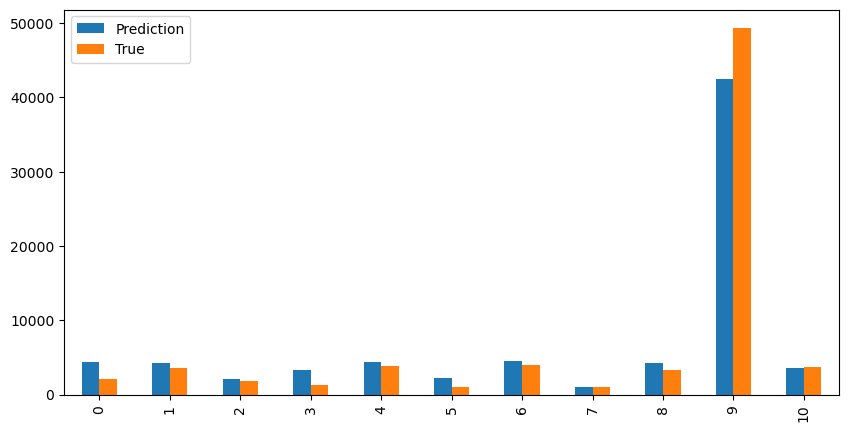

In [71]:
difference(model)

In [72]:
y_test

59     2150.0
55     3570.0
31     1830.0
30     1300.0
63     3870.0
75     1030.0
62     4000.0
2       990.0
50     3350.0
23    49350.0
51     3750.0
Name: Pile Capacity (kN), dtype: float64

## Convert to df and save

In [193]:
result = pd.DataFrame(np.c_[y_test, y_pred], columns=['True', 'Prediction'])
result

## Linear Regression

In [73]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_test)
print(y_pred)
print(np.array(y_test))

[ 4391.90887574  4788.30500295  4814.76477389  4705.23152381
  4865.22511699 -4447.69522711  3440.24532602 -2681.52254193
  4653.96625688 37263.29525893  4739.45090135]
[ 2150.  3570.  1830.  1300.  3870.  1030.  4000.   990.  3350. 49350.
  3750.]


In [75]:
show_scores(lr)

{'training MAE': 2575.6071146857935,
 'test MAE': 3175.8663305184864,
 'training MAPE': 1.024538099736452,
 'test MAPE': 1.450574133063875,
 'training MSE': 12346005.890380632,
 'test MSE': 20051967.15111204,
 'Training R^2': 0.9049045002283322,
 'Valid R^2': 0.8898339241827287}

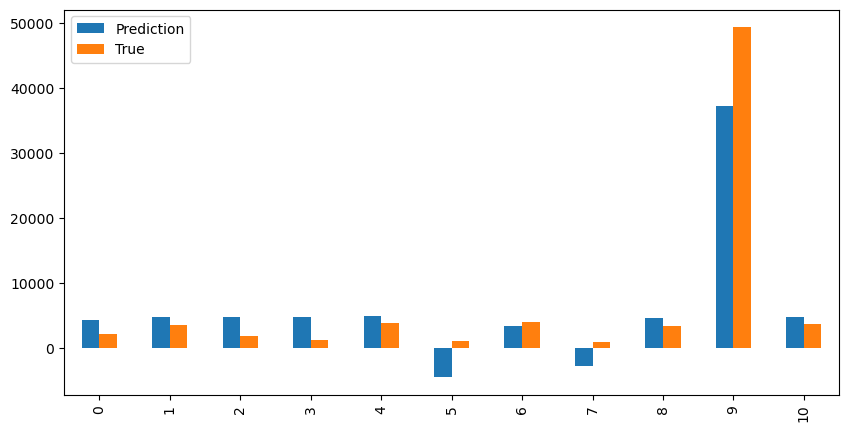

In [76]:
difference(lr)

## XGBoostRegressor

In [77]:
# Create and fit the XGBoost regression model
xr = xgb.XGBRegressor()
xr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
y_pred = xr.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(xr)

[ 4149.997   4312.8555  1326.6908  2234.285   4312.847   2200.201
  4799.0425  1040.003   3943.75   48451.375   3450.0051]
[ 2150.  3570.  1830.  1300.  3870.  1030.  4000.   990.  3350. 49350.
  3750.]


{'training MAE': 0.004785711115056818,
 'test MAE': 766.8100142045455,
 'training MAPE': 1.8090867289570927e-06,
 'test MAPE': 0.35529914760103826,
 'training MSE': 3.796528008851138e-05,
 'test MSE': 830413.3521677662,
 'Training R^2': 0.9999999999997076,
 'Valid R^2': 0.9954376855086003}

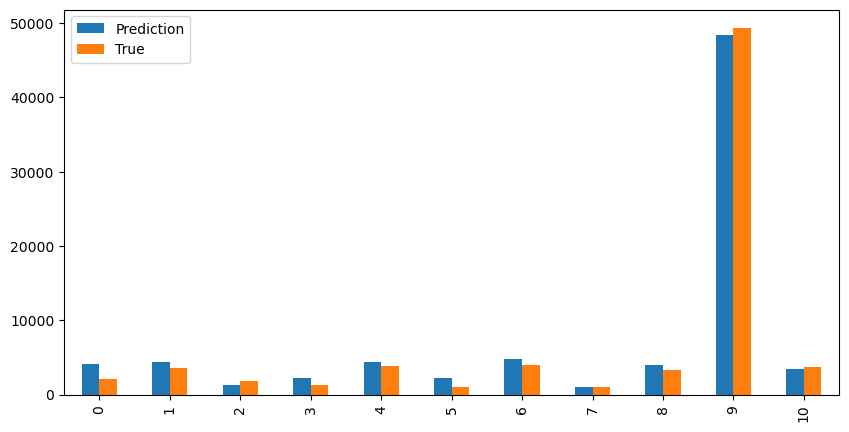

In [79]:
difference(xr)

### Near accurate best result so far
## Save as a df

In [80]:
result = pd.DataFrame(np.c_[y_test, y_pred], columns=['True', 'Prediction'])
result.to_csv('/kaggle/working/concrete_result_XGboost.csv', index=False)
rs = pd.read_csv('/kaggle/working/concrete_result_XGboost.csv')
rs

,True,Prediction
0,2150.0,4149.997070
1,3570.0,4312.855469
2,1830.0,1326.690796
3,1300.0,2234.284912
4,3870.0,4312.847168
5,1030.0,2200.200928
6,4000.0,4799.042480
7,990.0,1040.003052
8,3350.0,3943.750000
9,49350.0,48451.375000


## CatBoostRegressor

In [81]:
# Loading the BERT Classifier and Tokenizer along with Input module

from IPython.display import clear_output
cr = CatBoostRegressor();
cr.fit(X_train, y_train);
clear_output()

In [82]:
y_pred = cr.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(cr)

[ 4176.3264024   4221.64812004  2802.42013818  1999.65848768
  4455.0755555   1496.48804851  4663.79905307   970.12973205
  4138.81642774 39562.02336299  3417.2674907 ]
[ 2150.  3570.  1830.  1300.  3870.  1030.  4000.   990.  3350. 49350.
  3750.]


{'training MAE': 31.416604807523694,
 'test MAE': 1544.9828770342172,
 'training MAPE': 0.010792887162708466,
 'test MAPE': 0.31883873668854196,
 'training MSE': 1464.2775436062145,
 'test MSE': 9409467.666126065,
 'Training R^2': 0.9999887213560361,
 'Valid R^2': 0.948304117970335}

In [208]:
result = pd.DataFrame(np.c_[y_test, y_pred], columns=['True', 'Prediction'])
result.to_csv('/kaggle/working/concrete_result_cat_boost.csv', index=False)
rs = pd.read_csv('/kaggle/working/concrete_result_cat_boost.csv')
rs

,True,Prediction
0,2500.0,2310.031340
1,2278.0,2669.934967
2,3335.0,3702.368957
3,2846.0,2547.510942
4,3368.5,3017.017906
5,540.0,785.509107
6,1295.0,1588.092220
7,3867.0,3324.070307
8,2200.0,2798.781990


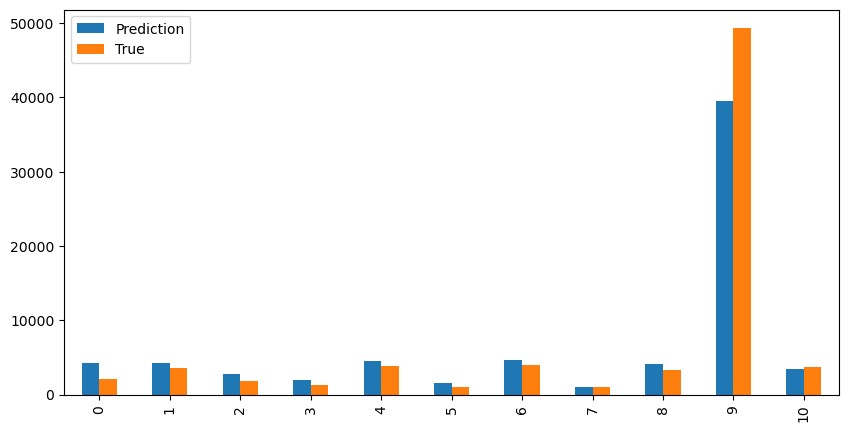

In [83]:
difference(cr)

## SupportVectorRegressor

In [84]:
# Create and fit the SVR model
models= SVR()
models.fit(X_train, y_train)

SVR()

In [85]:
y_pred = models.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(models)

[3571.77603892 3568.41316369 3551.46933888 3551.55715907 3567.77653656
 3551.50560702 3569.5651074  3551.30498672 3561.44926286 3571.13551307
 3562.73964237]
[ 2150.  3570.  1830.  1300.  3870.  1030.  4000.   990.  3350. 49350.
  3750.]


{'training MAE': 4833.8066796441435,
 'test MAE': 5217.221130034885,
 'training MAPE': 0.6956380385137052,
 'test MAPE': 0.8723664801128428,
 'training MSE': 141545584.69396248,
 'test MSE': 192639410.35206673,
 'Training R^2': -0.09025933054453561,
 'Valid R^2': -0.05836638003186012}

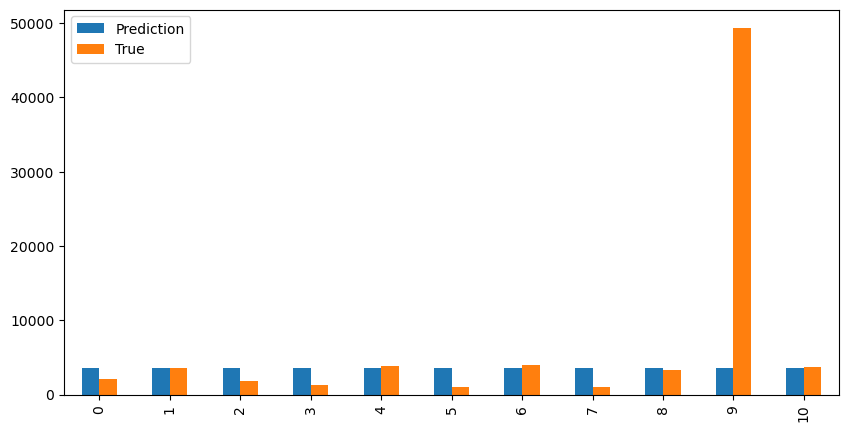

In [86]:
difference(models)

## Differentiate between best model

In [87]:
def shy(model):
    test_preds = model.predict(X_test)
    scores = {
        'R^2': r2_score(y_test, test_preds),
        'MAE': mean_absolute_error(y_test, test_preds),
        'MAPE': mean_absolute_percentage_error(y_test, test_preds)
        
    }
    return scores

In [88]:
shy(model)

{'R^2': 0.9697875362087327,
 'MAE': 1395.7577272727276,
 'MAPE': 0.4385332321611212}

In [89]:
cmp = pd.DataFrame({
    'RFRegressor': shy(model),
    'LinearRegression': shy(lr),
    'XGBRegressor': shy(xr),
    'CatBoostRegressor': shy(cr),
    'SVRegressor': shy(models)
})

In [90]:
cmp

,RFRegressor,LinearRegression,XGBRegressor,CatBoostRegressor,SVRegressor
R^2,0.969788,0.889834,0.995438,0.948304,-0.058366
MAE,1395.757727,3175.866331,766.810014,1544.982877,5217.221130
MAPE,0.438533,1.450574,0.355299,0.318839,0.872366


In [91]:
colors = ['red', 'green', 'blue', 'yellow', 'violet']
colors

['red', 'green', 'blue', 'yellow', 'violet']

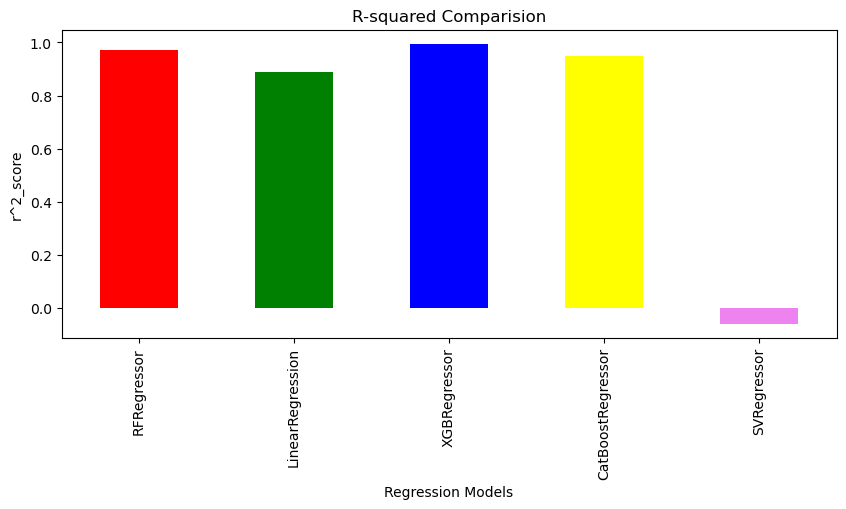

In [92]:
cmp.iloc[0].plot(kind='bar', figsize=(10,4), color=colors, title='R-squared Comparision')
plt.xlabel('Regression Models')
plt.ylabel('r^2_score')
plt.show()

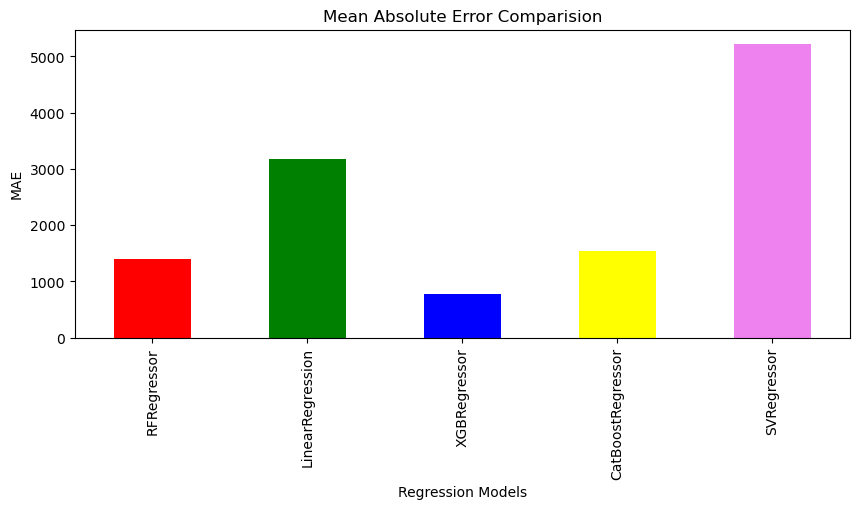

In [93]:
cmp.iloc[1].plot(kind='bar', figsize=(10,4), color=colors, title='Mean Absolute Error Comparision')
plt.xlabel('Regression Models')
plt.ylabel('MAE')
plt.show()

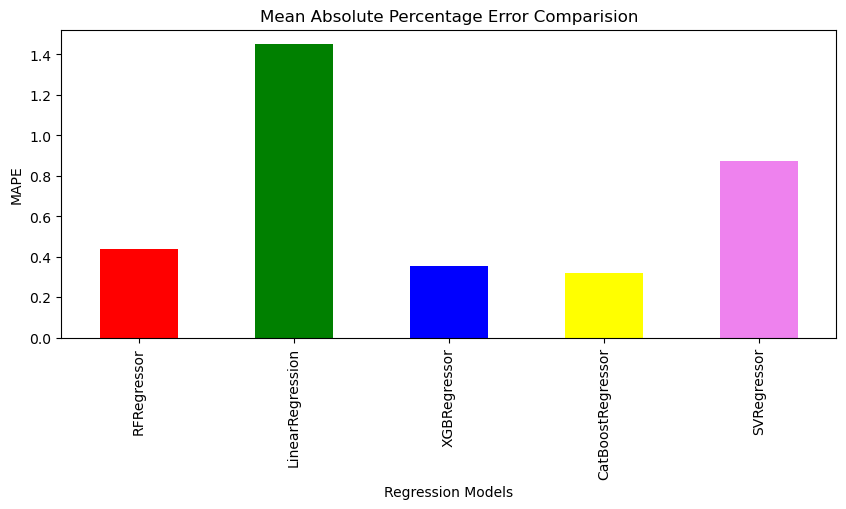

In [94]:
cmp.iloc[2].plot(kind='bar', figsize=(10,4), color=colors, title='Mean Absolute Percentage Error Comparision')
plt.xlabel('Regression Models')
plt.ylabel('MAPE')
plt.show()

author:Tanbeer Jubaer Oitik

## Cross Val Score  -->

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def check_cv(model):
    # Perform cross-validation and get the R-squared scores
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("Cross-Validation R-squared scores:", scores)
    print("Average R-squared score:", scores.mean())
    return scores

## rfc

In [96]:
check_cv(model)

Cross-Validation R-squared scores: [   0.52939434    0.96177044 -227.66531289   -0.64994606   -1.10617716]
Average R-squared score: -45.58605426485229


array([   0.52939434,    0.96177044, -227.66531289,   -0.64994606,
         -1.10617716])

## LInear Regression

In [97]:
check_cv(lr)

Cross-Validation R-squared scores: [   0.91805658    0.79332134 -253.11427036   -8.04138242  -13.03067594]
Average R-squared score: -54.49499015730487


array([   0.91805658,    0.79332134, -253.11427036,   -8.04138242,
        -13.03067594])

## XGBReg..

In [98]:
check_cv(xr)

Cross-Validation R-squared scores: [  -0.81447186    0.97965329 -178.64781989    0.21139083   -6.07444948]
Average R-squared score: -36.869139422362544


array([  -0.81447186,    0.97965329, -178.64781989,    0.21139083,
         -6.07444948])

## CatBoost

In [99]:
ans = check_cv(cr)
clear_output()

In [100]:
print(ans)

[  0.76438822   0.93064912 -85.31208369   0.09687024  -0.57444934]


## Feature Importance

In [101]:
model.feature_importances_

array([0.0366372 , 0.01217682, 0.01850723, 0.01213652, 0.04009286,
       0.04556781, 0.83488155])

In [102]:
# function to plot feature importance
def plot_features(columns, importance, n=20):
    df = (pd.DataFrame({
        'features': columns,
        'feature_importance': importance})
        .sort_values('feature_importance', ascending=False)
        .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importance'][:n])
    ax.set_ylabel('Features', color='orange')
    ax.set_xlabel('Feature Importance', color='orange')
    ax.invert_yaxis()
    plt.title('Feature Importance Bar Graph', color='darkblue')

## Random Forest Regressor Feature Importance

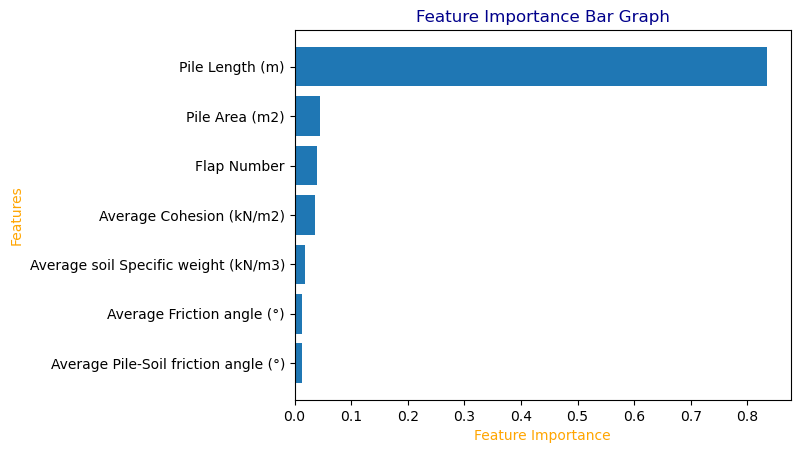

In [103]:
plot_features(X_train.columns, model.feature_importances_)

## XGBoost Regressor Feature Importance

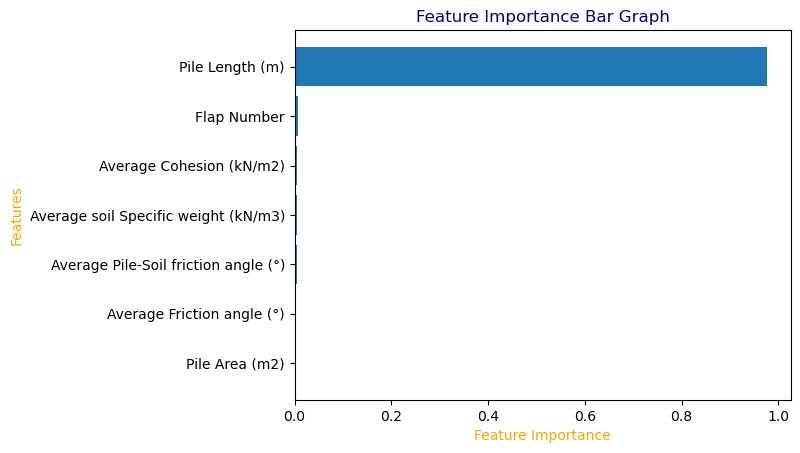

In [104]:
plot_features(X_train.columns, xr.feature_importances_)

## Cat Boost Regressor Feature Importance

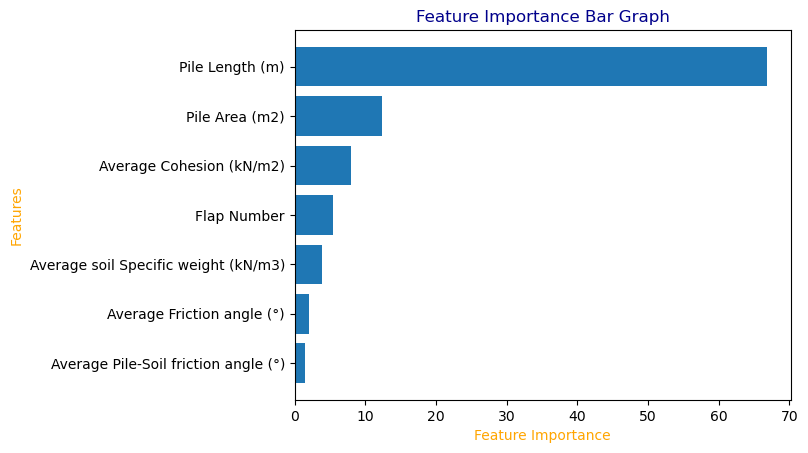

In [105]:
plot_features(X_train.columns, cr.feature_importances_)

Reference: `Mostain Tishad`
author: `Tanbeer jubaer`